# Breast Cancer Dataset
https://www.kaggle.com/ninjacoding/breast-cancer-wisconsin-benign-or-malignant


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import import_ipynb
from functions import *
from time import time

importing Jupyter notebook from functions.ipynb


In [2]:
data = pd.read_csv('data/breast_cancer.csv', header=0, index_col=0)
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


## Data Evaluation
---

### Checking for null values

In [3]:
if data.isna().sum().sum() == 0:
    print('No missing values present')
else: 
    print('NaN values across entire dataset: ', data.isna().sum().sum())

No missing values present


### Heatmap
Feature Colliniearity
- *Slight multicolliniearity observed between cell shape and size - L2 regularization ideal*

Text(0.5, 1.0, 'Breast Cancer Dataset Colliniearity')

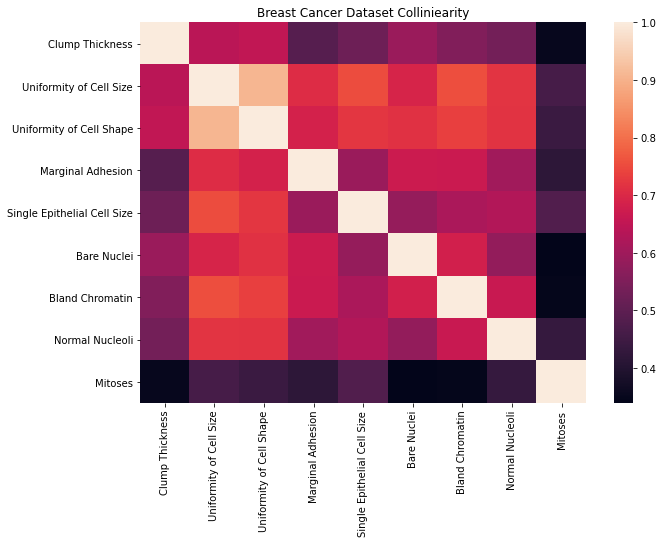

In [4]:
corr = data.loc[:, data.columns != 'Class'].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr)
plt.title('Breast Cancer Dataset Colliniearity')

### Histogram
Feature Distributions

Text(0.5, 0.92, 'Brain Tumor Dataset Feature Distributions')

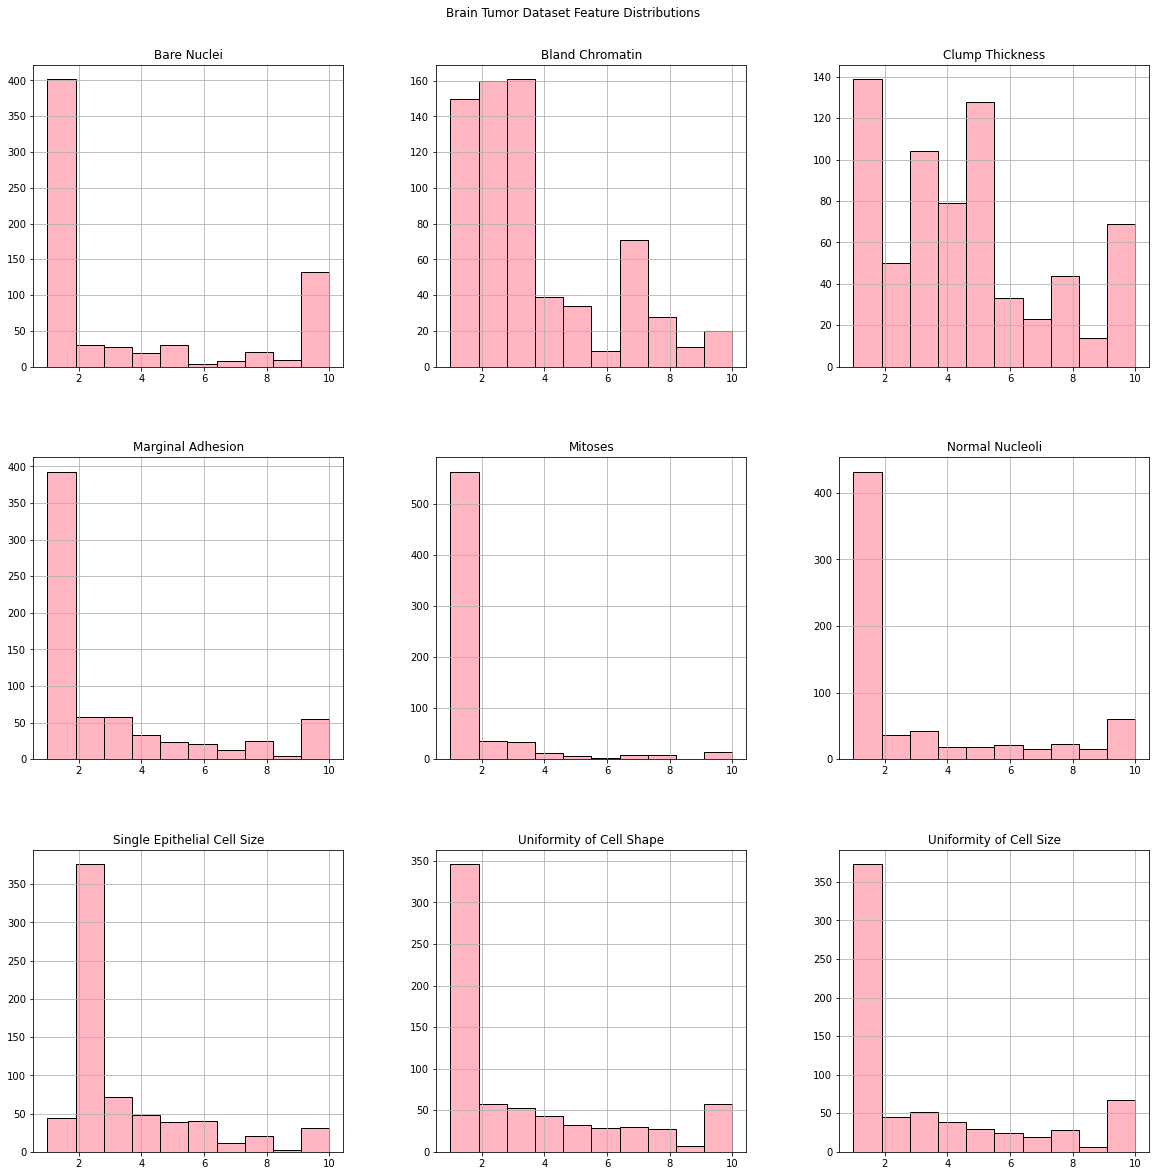

In [5]:
data.loc[:, data.columns != 'Class'].hist(bins=10, figsize=(20,20), color='lightpink', ec='black')
plt.suptitle('Brain Tumor Dataset Feature Distributions', y=0.92)

### Pie Chart 
Class Balance
- *Strong class imbalance observed*

In [6]:
class_counts = data['Class'].value_counts()
class_counts

2    444
4    239
Name: Class, dtype: int64

Text(0.5, 1.05, 'Brain Tumor Dataset Class Distribution')

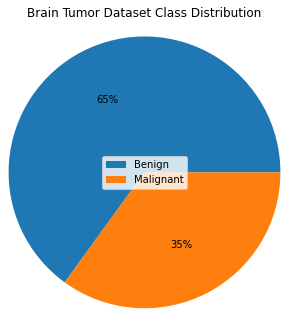

In [7]:
classes = ['Benign', 'Malignant']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.0f%%', radius=1.25)
plt.legend(labels=classes, loc='center')
plt.title('Brain Tumor Dataset Class Distribution', y=1.05)

## Data Preparation
---

In [8]:
#Replace class labels to '0' and '1' to work with keras one-hot encoding function
data['Class'] = data['Class'].replace([2], 0)
data['Class'] = data['Class'].replace([4], 1)

In [9]:
#Train/test subsets
train, test = train_test_split(data, test_size=0.1)
train, val = train_test_split(train, test_size=0.05)

In [10]:
#Separating labels from data
x_test, y_test = features_labels_split(test, 'Class')
x_train, y_train = features_labels_split(train, 'Class')
x_val, y_val = features_labels_split(val, 'Class')

In [11]:
#Scaling
scaler = preprocessing.MinMaxScaler() 
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test) 
x_val = scaler.transform(x_val) 

In [12]:
#Label one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [13]:
print(f'Total samples: {x_test.shape[0] + x_train.shape[0] + x_val.shape[0]}')
print(f'Testing samples: {x_test.shape[0]}') 
print(f'Training samples: {x_train.shape[0]}')
print(f'Validation samples {x_val.shape[0]}')

Total samples: 683
Testing samples: 69
Training samples: 583
Validation samples 31


## Model
---

In [20]:
#Define
model = Sequential()
model.add(Dense(units=8, input_dim=x_train.shape[1], activation='relu', kernel_regularizer=l2(0.1))) 
model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(0.1))) 
model.add(Dense(units=2, activation="softmax"))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 34        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________


In [22]:
#Compile
model.compile(optimizer = Adam(learning_rate=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [23]:
#Fit
start = time()

history = model.fit(
    x_train, 
    y_train, 
    validation_data = (x_val, y_val),
    epochs=200, 
    verbose=0)

print(f'Complete. \nModel trained in {round(time()-start, 2)} sec')

Complete. 
Model trained in 5.5 sec


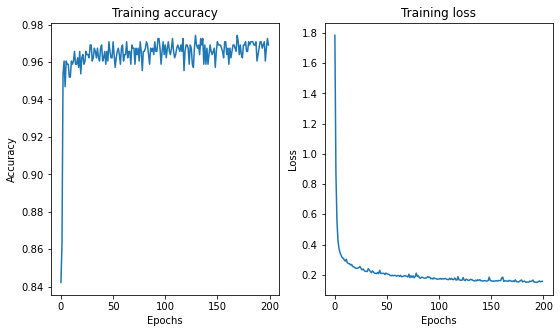


Training accuracy: 96.91%
Training loss: 0.157


In [24]:
plot_display_metrics(model, history)

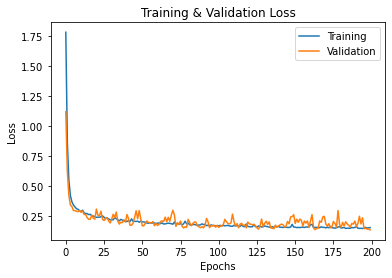


Training accuracy: 96.91%
Training loss: 0.157

Validation accuracy: 96.77%
Validation loss: 0.137


In [25]:
plot_train_val(history)

In [26]:
#Test
test_score = model.evaluate(x_test, y_test)
print(f"Testing accuracy: {round(test_score[1], 4) * 100}%")
print(f"Testing loss: {round(test_score[0], 4)}")

3/3 [==============================] - 0s 908us/step - loss: 0.1228 - accuracy: 0.9710
Testing accuracy: 97.1%
Testing loss: 0.1228


## Model Evaluation
---

### Confusion Matrix

In [27]:
#Encased in np.argmax() to convert from one-hot encoding to regular so it can work with sklearn functionality
y_pred = np.argmax(model.predict(x_test), axis=-1) 
y_true = np.argmax(y_test, axis=1)

print(np.unique(y_true)) #to check order classes appear in to correctly label confusion matrix
labels = ['Benign', 'Malignant']

[0 1]


Text(33.0, 0.5, 'True')

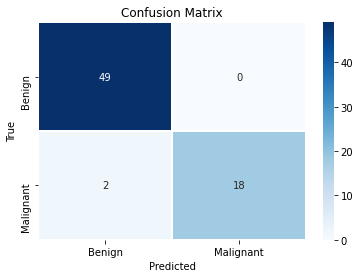

In [28]:
confusion = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(confusion, index=labels, columns=labels)

sns.heatmap(df_cm, annot=True, linewidths=0.8, fmt='d', cmap='Blues')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('True') 

In [29]:
print(f'False positives: ', confusion[0, 1])
print(f'False negatives: ', confusion[1, 0])

False positives:  0
False negatives:  2


### Model Metrics

In [30]:
print(f'Weighted Precision: {round(precision_score(y_true, y_pred, average="weighted") * 100, 2)}%')
print(f'Weighted Recall: {round(recall_score(y_true, y_pred, average="weighted") * 100, 2)}%')
print(f'Weighted F1-score: {round(f1_score(y_true, y_pred, average="weighted") * 100, 2)}%')

Weighted Precision: 97.22%
Weighted Recall: 97.1%
Weighted F1-score: 97.05%
